In [3]:
import pandas as pd

file_path = "/Users/anirudhravipudi/Desktop/AI/Practice/Telco_Customer_churn.csv"
df = pd.read_csv(file_path)

print("Dataset Shape:", df.shape)
print("\n Columns:\n", df.columns.tolist())
print("\n Missing Values:\n:", df.isnull().sum())

print("Target distribution (Churn):", df['Churn'].value_counts())

print("Sample Rows:")
print(df.head())


Dataset Shape: (7043, 21)

 Columns:
 ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

 Missing Values:
: customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64
Target distribution (Churn): Churn
No     5174
Yes    1869
Name: count, dtype: int64
Sample Rows:
   customerID  gender  SeniorCitizen Partner 

In [11]:
df_clean = df.copy()

df_clean['Churn'] = df_clean['Churn'].map({'Yes': 1, 'No': 0})

df_clean['TotalCharges'] = pd.to_numeric(df_clean['TotalCharges'], errors='coerce')

df_clean.dropna(subset=['TotalCharges'], inplace=True)

df_clean.drop('customerID', axis=1, inplace=True)

df_model = pd.get_dummies(df_clean, drop_first=True)

print("Cleaned Dataset Shape:", df_model.shape)
print("Preview:", df_model.head())

Cleaned Dataset Shape: (7032, 31)
Preview:    SeniorCitizen  tenure  MonthlyCharges  TotalCharges  Churn  gender_Male  \
0              0       1           29.85         29.85      0        False   
1              0      34           56.95       1889.50      0         True   
2              0       2           53.85        108.15      1         True   
3              0      45           42.30       1840.75      0         True   
4              0       2           70.70        151.65      1        False   

   Partner_Yes  Dependents_Yes  PhoneService_Yes  \
0         True           False             False   
1        False           False              True   
2        False           False              True   
3        False           False             False   
4        False           False              True   

   MultipleLines_No phone service  ...  StreamingTV_No internet service  \
0                            True  ...                            False   
1                        

Accuracy: 0.7874911158493249

 Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.52      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



/opt/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


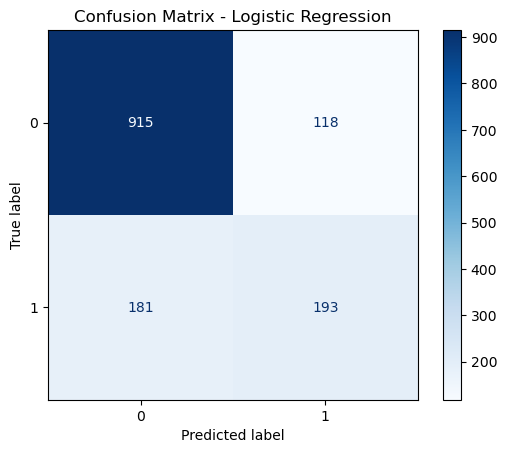

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

X = df_model.drop('Churn', axis=1)
y = df_model['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_reg.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

Accuracy: 0.7867803837953091

 Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.88      0.86      1033
           1       0.62      0.52      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



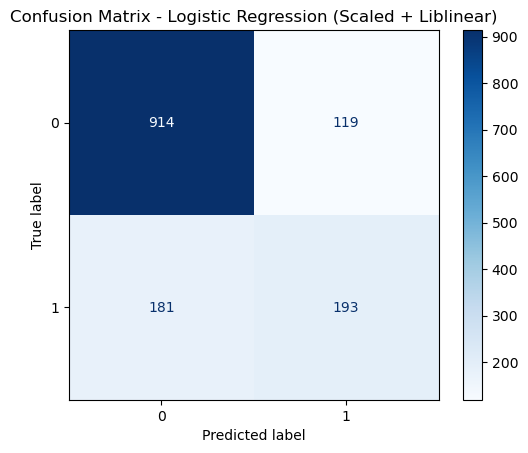

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

X = df_model.drop('Churn', axis=1)
y = df_model['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_reg = LogisticRegression(solver='liblinear', max_iter=2000)
log_reg.fit(X_train_scaled, y_train)

y_pred = log_reg.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_reg.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression (Scaled + Liblinear)")
plt.show()

Accuracy: 0.7313432835820896

 Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.71      0.80      1033
           1       0.50      0.79      0.61       374

    accuracy                           0.73      1407
   macro avg       0.70      0.75      0.70      1407
weighted avg       0.80      0.73      0.75      1407



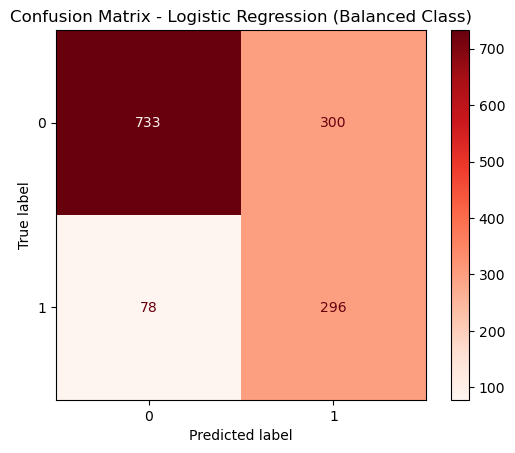

In [41]:
from sklearn.linear_model import LogisticRegression

log_reg_balanced = LogisticRegression(
    solver='liblinear',
    class_weight='balanced',
    max_iter=2000
)
log_reg_balanced.fit(X_train_scaled, y_train)

y_pred_balanced = log_reg_balanced.predict(X_test_scaled)

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

print("Accuracy:", accuracy_score(y_test, y_pred_balanced))
print("\n Classification Report:\n", classification_report(y_test, y_pred_balanced))

cm_bal = confusion_matrix(y_test, y_pred_balanced)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_bal, display_labels=log_reg_balanced.classes_)
disp.plot(cmap='Reds')
plt.title("Confusion Matrix - Logistic Regression (Balanced Class)")
plt.show()


In [43]:
!pip install imbalanced-learn

Accuracy: 0.7867803837953091

 Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.88      0.86      1033
           1       0.62      0.52      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



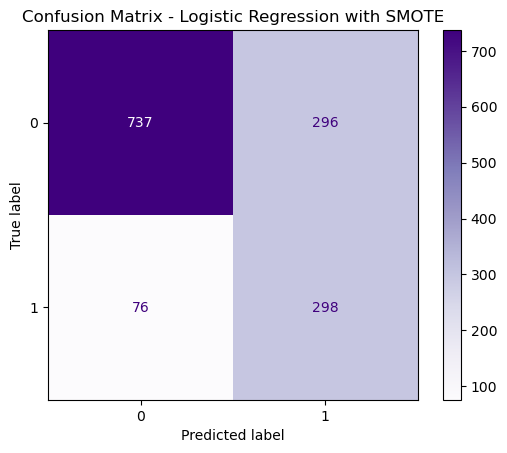

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

X = df_model.drop('Churn', axis=1)
y = df_model['Churn']

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train_scaled, y_train)
log_reg_smote = LogisticRegression(solver='liblinear', max_iter=2000)
log_reg_smote.fit(X_train_sm, y_train_sm)

y_pred_sm = log_reg_smote.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred))

cm_sm = confusion_matrix(y_test, y_pred_sm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_sm, display_labels=log_reg_smote.classes_)
disp.plot(cmap='Purples')
plt.title("Confusion Matrix - Logistic Regression with SMOTE")
plt.show()

In [55]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# ✅ Define parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs'],
    'penalty': ['l2']
}

# 🧪 GridSearch on SMOTE data
grid = GridSearchCV(
    estimator=LogisticRegression(max_iter=2000),
    param_grid=param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1
)

grid.fit(X_train_sm, y_train_sm)

# ✅ Best model
best_log_reg = grid.best_estimator_
print("✅ Best Parameters:", grid.best_params_)

✅ Best Parameters: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}


Accuracy: 0.7356076759061834

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.71      0.80      1033
           1       0.50      0.80      0.62       374

    accuracy                           0.74      1407
   macro avg       0.70      0.76      0.71      1407
weighted avg       0.80      0.74      0.75      1407



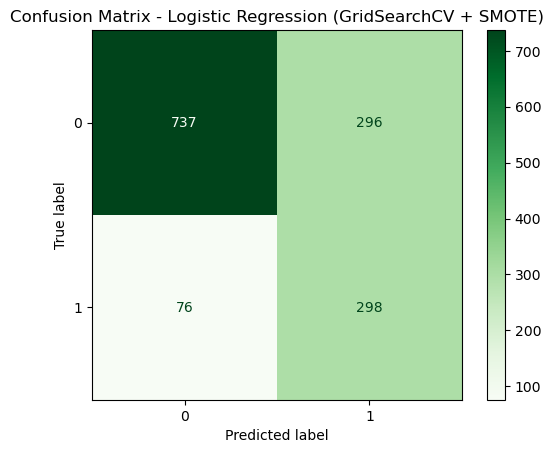

In [63]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

y_pred_grid = best_log_reg.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred_grid))
print("\nClassification Report:\n", classification_report(y_test, y_pred_grid))

cm_grid = confusion_matrix(y_test, y_pred_grid)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_grid, display_labels=log_reg.classes_)
disp.plot(cmap='Greens')
plt.title("Confusion Matrix - Logistic Regression (GridSearchCV + SMOTE)")
plt.show()

ROC AUC Score: 0.8321


/opt/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128309 (\N{LARGE BLUE CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


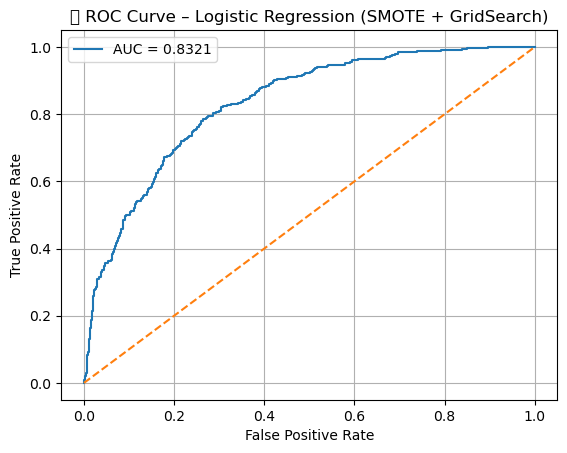

In [65]:
from sklearn.metrics import roc_auc_score, roc_curve

y_probs = best_log_reg.predict_proba(X_test_scaled)[:, 1]

auc = roc_auc_score(y_test, y_probs)
print(f"ROC AUC Score: {auc:.4f}")

fpr, tpr, thresholds = roc_curve(y_test, y_probs)
plt.plot(fpr, tpr, label=f"AUC = {auc:.4f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("🔵 ROC Curve – Logistic Regression (SMOTE + GridSearch)")
plt.legend()
plt.grid()
plt.show()